In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
# 한글 폰트를 사용할 때 마이너스 부호가 깨져 보이는 문제에 대처한다.
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [3]:
data = np.random.randint(-100, 100, 50).cumsum()
data

array([ -20,   52,   32,  -38,  -60, -117, -153, -194, -196, -255, -167,
        -82,  -90, -152, -141,  -78, -168, -230, -247, -309, -354, -266,
       -295, -250, -336, -424, -473, -376, -342, -249, -234, -281, -246,
       -265, -226, -166, -251, -211, -248, -251, -288, -376, -431, -527,
       -598, -669, -624, -628, -603, -573], dtype=int32)

In [ ]:
plt.figure(figsize=(8, 6)) # 차트 크기 설정
# plt.rcParams['figure.figsize'] = (8, 6) # 차트 크기 설정
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이') # 차트 제목
plt.xlabel('시간(분)') # x축 제목
plt.ylabel('주식 가격') # y축 제목
plt.show()

폰트를 설정해 주기에 앞서 설치된 matplotlib의 버전과 설치된 위치 정보를 확인한다.

In [ ]:
print('버전:', mpl.__version__)
print('설치 위치:', mpl.__file__)
print('설정 정보 위치:', mpl.get_configdir())
print('캐시 위치:', mpl.get_cachedir())

matplotlib의 설정 위치 정보를 알았으니 설정 파일의 위치를 확인한다.

In [ ]:
print('설정 파일 위치:', mpl.matplotlib_fname())

컴퓨터에 설치된 폰트 목록을 얻어온다.

In [ ]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print(len(font_list))
print(font_list[:10])

In [ ]:
f = [f.name for f in fm.fontManager.ttflist]
print(len(f))
print(f[:10])

나눔 글꼴을 사용할 것이므로 폰트 이름에 'Nanum'이 포함된 폰트만 가져온다.

In [ ]:
font_list = [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]
font_list[:10]

위의 코드를 실행한 결과가 []만 나오거나 설치한 폰트가 보이지 않는다면 캐시 폴더로 이동해 폴더의 모든 내용을 삭제한 후 다시 실행하면 설치된 폰트 목록이 정상적으로 보인다.

In [ ]:
mpl.font_manager._rebuild()

한글 폰트를 사용하도록 설정하는 방법은 3가지가 있다.

<1> FontProperties를 사용하는 방법 => 그래프의 폰트가 필요한 항목마다 지정해줘야 한다.

In [ ]:
# 텍스트를 지정하는 항목에 지정해서 사용할 수 있고 지정해준 항목에만 해당 폰트가 적용된다.
# matplotlib.pyplot => title(), xlabel(), ylabel(), legend(), text()
# matplotlib.axes => set_title()

font = 'C:\\WINDOWS\\Fonts\\NanumGothicCoding.ttf'
fontprop = fm.FontProperties(fname=font, size=15)

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이', fontproperties=fontprop)
plt.xlabel('시간(분)', fontproperties=fontprop)
plt.ylabel('주식 가격', fontproperties=fontprop)
plt.show()

<2> matplotlib 라이브러리의 rcParams[]로 전역 글꼴 설정 => 그래프의 폰트가 필요한 파일마다 지정해줘야 한다.

In [ ]:
# 기본 설정 읽기
print('기본으로 설정된 폰트 이름:', plt.rcParams['font.family'])
print('기본으로 설정된 폰트 크기:', plt.rcParams['font.size'])

In [ ]:
# 2-1
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 15

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이')
plt.xlabel('시간(분)')
plt.ylabel('주식 가격')
plt.show()

In [ ]:
# 2-2
# rcParams 대신 FontProperties의 plt.rc를 사용하는 방법이 있다.
font = 'C:\\WINDOWS\\Fonts\\NanumGothicCoding.ttf'
font_name = fm.FontProperties(fname=font, size=15).get_name()
print(font_name)
plt.rc('font', family=font_name)

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이')
plt.xlabel('시간(분)')
plt.ylabel('주식 가격')
plt.show()

<3> 폰트 설정 정보를 matplotlib 설정 파일에 직접 넣어준다. => 그래프의 폰트가 필요한 컴퓨터마다 지정해줘야 한다.

In [4]:
# mpl.matplotlib_fname()를 실행하면 출력되는 경로의 파일을 수정한다.
# 이곳에 폰트를 지정하면 쥬피터 노트북을 실행할 때 마다 바로 글꼴이 로드되도록 설정할 수 있다.
print(mpl.matplotlib_fname())
# font.family: sans-serif => NanumGothicCoding
# font.size: 10.0 => 15.0

d:\python36\lib\site-packages\matplotlib\mpl-data\matplotlibrc


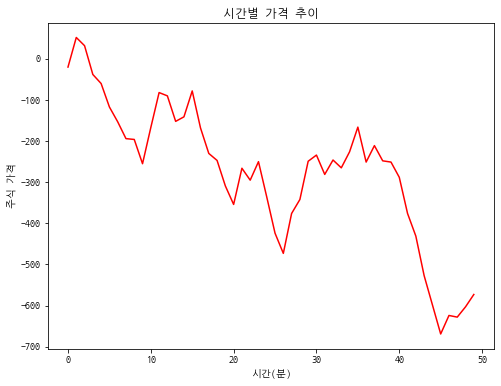

In [5]:
plt.figure(figsize=(8, 6))
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이')
plt.xlabel('시간(분)')
plt.ylabel('주식 가격')
plt.show()